### TIPS Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

### 1.Who gives more tips(Male or Female)?


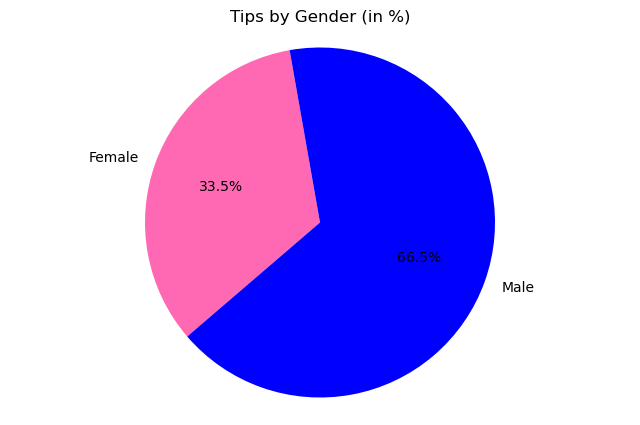

In [11]:
more_tips=df.groupby(["sex"]).sum()["tip"]
plt.figure(figsize=(8, 5))
plt.pie(more_tips, labels=more_tips.index, autopct='%1.1f%%', colors=["hotpink", "blue"], startangle=100)

plt.title("Tips by Gender (in %)")
plt.axis('equal') 
plt.show()

Males gave more than 60% of the total tips, while females contributed less than 40%, suggesting that males tend to tip more.

### 2.Who gives more tip(smoker or non smoker)?


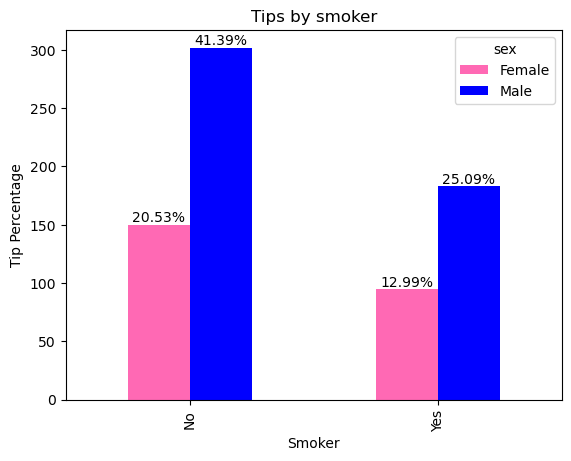

In [12]:
smoker_tips=df.groupby(["sex","smoker"]).sum()["tip"]
ab=smoker_tips.unstack(level=0).plot(kind="bar",color=["hotpink","blue"])

total_tips=smoker_tips.sum()

for i, bar in enumerate(ab.patches):
    percentage = (bar.get_height() / total_tips) * 100
    ab.annotate(f'{percentage:.2f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom')

plt.title("Tips by smoker")
plt.ylabel("Tip Percentage")
plt.xlabel("Smoker")
plt.show()


Non-smokers give more tips overall, and among them, non-smoker males tip more than non-smoker females.

### 3.Which group size tips more?


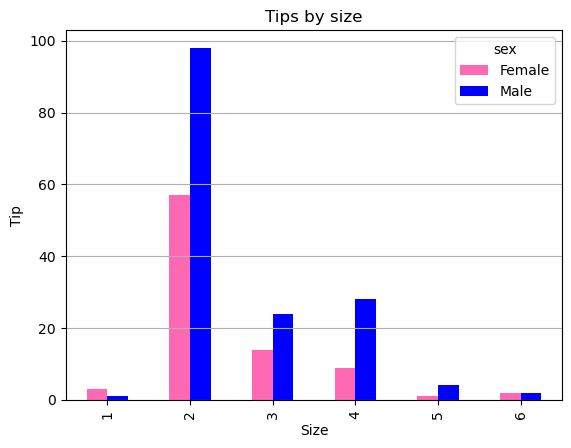

In [13]:
group_size=df.groupby(["sex","size"]).count()["tip"]
group_size.unstack(level=0).plot(kind="bar",color=["hotpink","blue"])

plt.grid(axis="y") 
plt.title("Tips by size")
plt.xlabel("Size")
plt.ylabel("Tip")
plt.show()


Pairs of two people give more tips, and among them, pairs of two males tip more than pairs of two females.

### 4.Which day receives more tips based on gender?


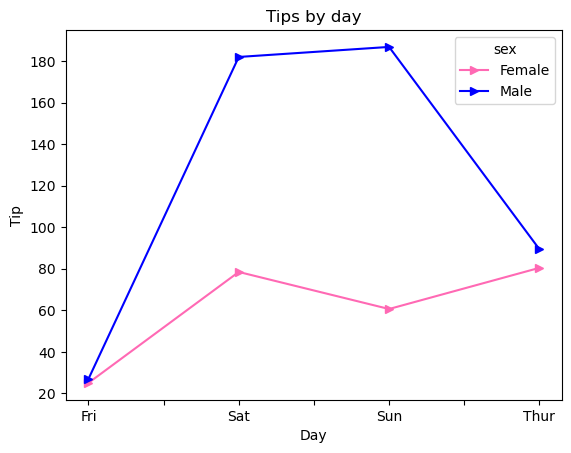

In [14]:
day=df.groupby(["sex","day"]).sum()["tip"]
day.unstack(level=0).plot(color=["hotpink","blue"],marker=">")

plt.title("Tips by day")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.show()

On Sundays, males give more tips than females.

### 5.Which Time receives more tips?


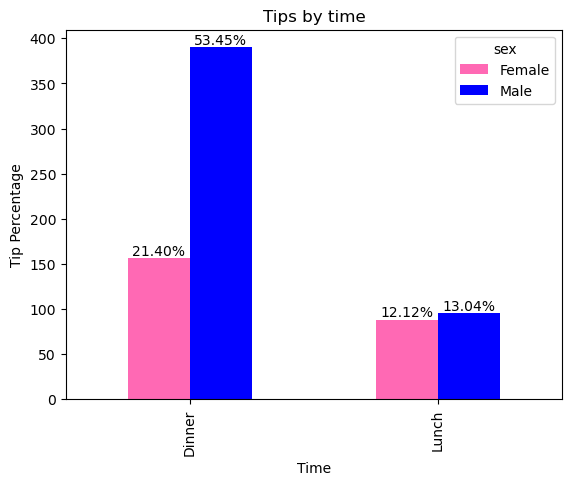

In [15]:
time=df.groupby(["sex","time"]).sum()["tip"]
ab=time.unstack(level=0).plot(kind="bar",color=["hotpink","blue"])

total_tips=time.sum()

for i, bar in enumerate(ab.patches):
    percentage = (bar.get_height() / total_tips) * 100
    ab.annotate(f'{percentage:.2f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom')

plt.title("Tips by time")
plt.xlabel("Time")
plt.ylabel("Tip Percentage")
plt.show()

During dinner time, both give more tips, but males tip more than females.

### Conclusion:

Males contribute over 60% of total tips, while females account for less than 40%. This pattern is consistent Non-smoking males tend to give higher tips on Sundays during dinner time. Understanding these trends can help businesses enhance their service and tipping strategies.